In [228]:
top_n_list = [1, 3, 5, 8, 10, 15]

model_collection = {k: v for k, v in info_stage2.model_collection.items()}
df_list = []
for top_n in top_n_list:
    df = mapping_routine.prep_weighted_average_df(
        model_collection=model_collection, top_num=top_n, ebi_df=EBI_DATA
    )
    df_list.append(df)

2022-07-13 11:18:17.056 | INFO     | funcs.data_processing.mapping_routine:calc_weighted_average:108 - BLUEBERT-EFO
2022-07-13 11:18:23.787 | INFO     | funcs.data_processing.mapping_routine:calc_weighted_average:124 - 1177
2022-07-13 11:18:23.789 | INFO     | funcs.data_processing.mapping_routine:calc_weighted_average:108 - BioBERT
2022-07-13 11:18:30.542 | INFO     | funcs.data_processing.mapping_routine:calc_weighted_average:124 - 1177
2022-07-13 11:18:30.544 | INFO     | funcs.data_processing.mapping_routine:calc_weighted_average:108 - BioSentVec
2022-07-13 11:18:37.310 | INFO     | funcs.data_processing.mapping_routine:calc_weighted_average:124 - 1177
2022-07-13 11:18:37.312 | INFO     | funcs.data_processing.mapping_routine:calc_weighted_average:108 - BlueBERT
2022-07-13 11:18:44.068 | INFO     | funcs.data_processing.mapping_routine:calc_weighted_average:124 - 1177
2022-07-13 11:18:44.070 | INFO     | funcs.data_processing.mapping_routine:calc_weighted_average:108 - GUSE
2022-07

In [229]:
df_x = []
for idx, top_n in enumerate(top_n_list):
    df = (
        df_list[idx]
        .groupby(["Model"])
        .apply(lambda df: pd.Series({"value": df["value"].sum() / len(df)}))
        .assign(top_n=top_n)
    )
    df_x.append(df)
df_x = pd.concat(df_x).reset_index(drop=False).rename(columns={"Model": "Method"})
df_x

,Method,value,top_n
0,BLUEBERT-EFO,0.692833,1
1,BioBERT,0.596897,1
2,BioSentVec,0.625596,1
3,BlueBERT,0.583493,1
4,GUSE,0.558100,1
5,Levenshtein,0.491384,1
6,SciSpacy,0.625187,1
7,Spacy,0.557354,1
8,Zooma,0.573172,1
9,BLUEBERT-EFO,0.631183,3


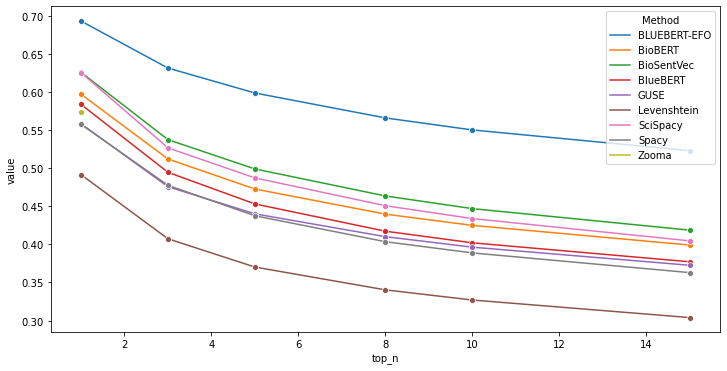

In [230]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_x, x="top_n", y="value", hue="Method", marker="o")

output_file = output_dir / "wa-line-all.png"
plt.savefig(output_file, dpi=1000)